In [185]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')

df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
#Following CRISP-DM by outlining every step of the process
#1-BUSINESS UNDERSTANDING (1) What percentage of developers love problem solving (2) What is the average Salary of a developer?,(3) Can we predict salary based on software developer's love for problem solving? 

Text(0.5,1,'ProblemSolving')

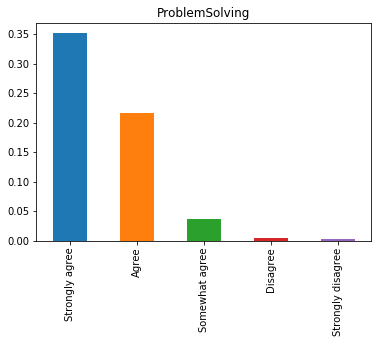

In [141]:
#2 DATA UNDERSTANDING
ps = df.ProblemSolving.value_counts()
(ps/df.shape[0]).plot(kind = "bar");
plt.title("ProblemSolving")

In [142]:
#DATA UNDERSTANDING continued 
df.describe()


,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371840,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263690
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225807
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [187]:
#3 PREPARDE DATA

df['ProblemSolving'].isnull().mean() #missing values

#group
df.groupby(['ProblemSolving']).mean()['Salary']

# sort and drop NaN values
df.groupby(['ProblemSolving']).mean()['Salary'].sort_values().dropna()

#Drop the rows with missing salaries
drop_sal_df = num_vars.dropna(subset=['Salary'], axis=0)

#creating new datafame with salary only
salary = df.Salary

#transform categorical data for problem solving into numerical data 
dummies = pd.get_dummies(df.ProblemSolving)

    
#mergeing the salary dataframe with the problem solving data frame
merged = pd.concat([dummies, salary], axis ='columns')


#clean dtaa, remove NaN values 
median = math.floor(final.Salary.median())

s2 = final.Salary.fillna(median)

#mergeing the salary dataframe with the problem solving data frame
merged2 = pd.concat([dummies, s2], axis ='columns')
merged2

,Agree,Disagree,Somewhat agree,Strongly agree,Strongly disagree,Salary
0,0,0,0,1,0,50000.00000
1,0,0,0,0,0,50000.00000
2,0,0,0,1,0,113750.00000
3,0,0,0,1,0,50000.00000
4,0,0,0,0,0,50000.00000
5,0,0,0,0,0,50000.00000
6,0,0,0,0,0,50000.00000
7,0,0,0,0,0,50000.00000
8,0,0,0,1,0,50000.00000
9,0,0,0,0,0,50000.00000


In [146]:
# 4 MODEL DATA
reg = linear_model.LinearRegression()
reg.fit(merged2[['Agree', 'Disagree','Strongly agree','Strongly disagree']],merged2.Salary)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
reg.coef_

array([ -167.35740556, -2072.88206772,  1858.43323498,   516.30085957])

In [148]:
reg.intercept_

50969.83934592624

In [188]:
#5 RESULTS 
#predict the salary of a developer who loves to solve problems
love1 = reg.predict([[1,0,0,0]])
love1

array([50802.48194036])

In [189]:
#predict the salary of a developer who does not love to solve problems
nolove = reg.predict([[0,1,0,0]])
nolove

array([48896.95727821])

In [190]:
#predict the salary of a developer who strongly loves to solve problems
love2 = reg.predict([[0,0,1,0]])
love2

array([52828.27258091])

In [ ]:
#DEPLOY
#Please read Blog Post On Medium 